# Time Series Modeling

# *Daily Female births in California in 1959 (daily data)*

Objective is to,

    1. Fit ARIMA model to the time-series
    2. Examine the model Quality using ACF, PACF and AIC
    3. Examine the auto-correlation in residuals using Ljung-Box test

## *Guide lines for Time Series Modeling*

    1. See if Trend exists in the data. * Trend suggests differencing *
    2. Variation in variance suggests * transformation *
    3. Common transformation: Log and then differencing
    4. It's also called as * Log return *
    5. Look at ACF to understand the order of MA process
    6. Look at PACF to understand the order of AR process
    7. Parsimonious model Quality and selection principle : AIC
    8. Look at SSE
    9. Whiteness diagnostics (Ljung-Box Q statistic)
    10. Estimation

In [7]:
library('astsa')

Date,Daily.total.female.births.in.California..1959
01-01-1959,35
02-01-1959,32
03-01-1959,30
04-01-1959,31
05-01-1959,44
06-01-1959,29


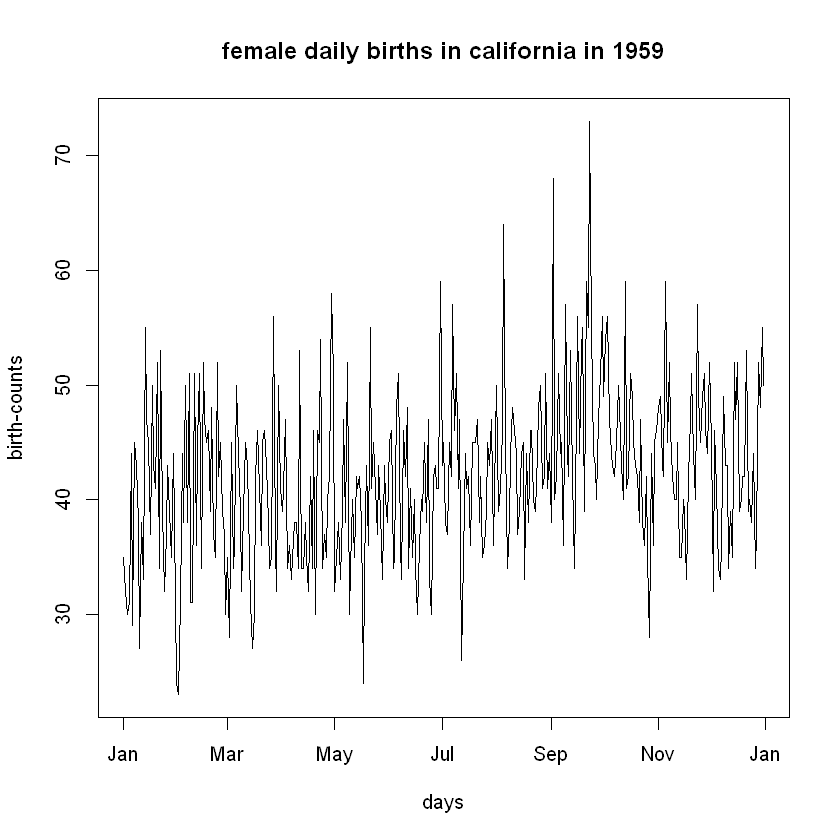

In [11]:
#Read the data
daily_births <- read.csv("daily-total-female-births-in-cal.csv",stringsAsFactors=F)
head(daily_births)

#formatting
daily_births_count <- daily_births$Daily.total.female.births.in.California..1959
date <- as.Date(daily_births$Date,"%d-%m-%Y")

#plotting
plot(daily_births_count~ date,type='l', main='female daily births in california in 1959',xlab='days',ylab='birth-counts')



In [14]:
#from look, the plot looks non-stationary
#There seems to be a upward trend
#let's try to infer from Box.tes
data <- daily_births_count
Box.test(data,type='Ljung-Box',lag = log(length(data)))
#There is a clear evidence of auto-correlation


	Box-Ljung test

data:  data
X-squared = 36.801, df = 5.8999, p-value = 1.737e-06



	Box-Ljung test

data:  data_d1
X-squared = 78.74, df = 5.8999, p-value = 5.662e-15


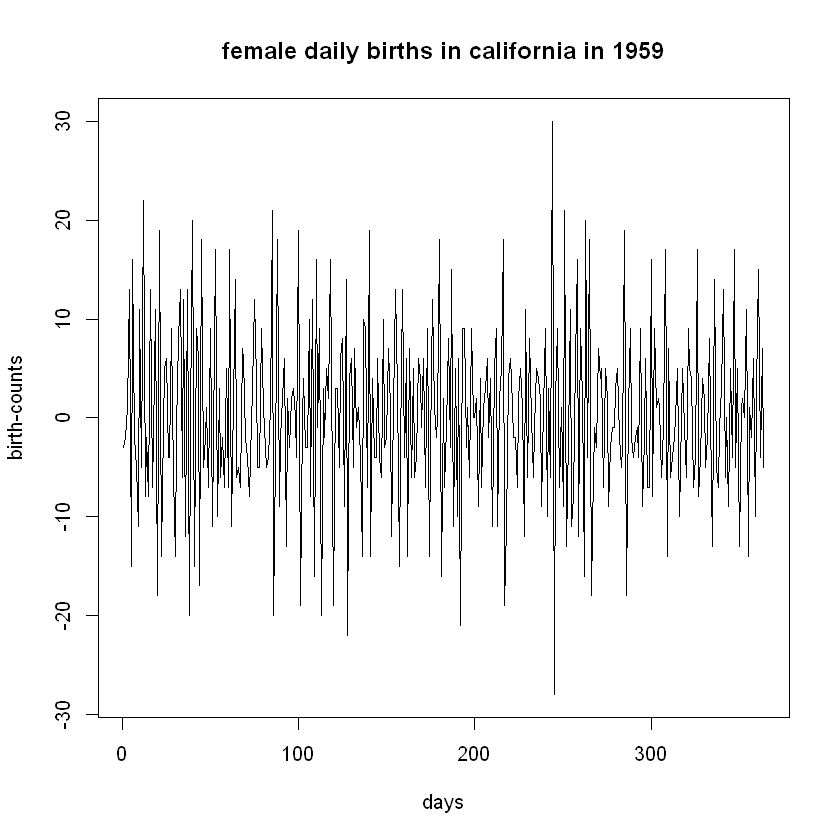

In [17]:
#let's do the differencing to remove the trend
data_d1 <- diff(data)
plot(data_d1,type='l', main='female daily births in california in 1959',xlab='days',ylab='birth-counts') #looks much better. Looks almost stationary except for few peaks
Box.test(data_d1,type='Ljung-Box',lag = log(length(data)))
#Auto-correlation still exists

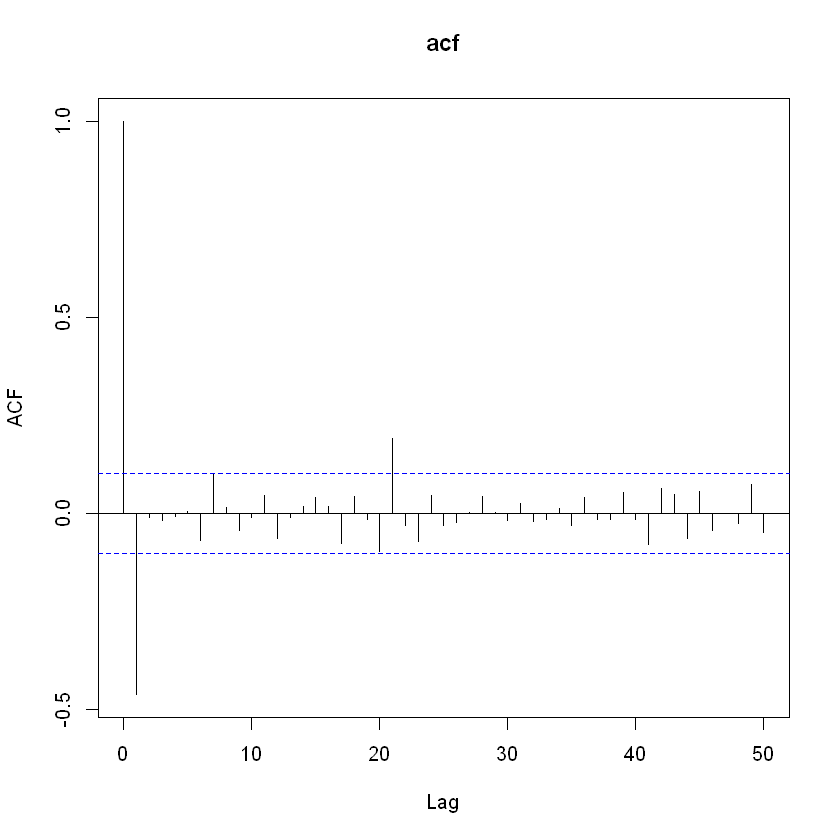

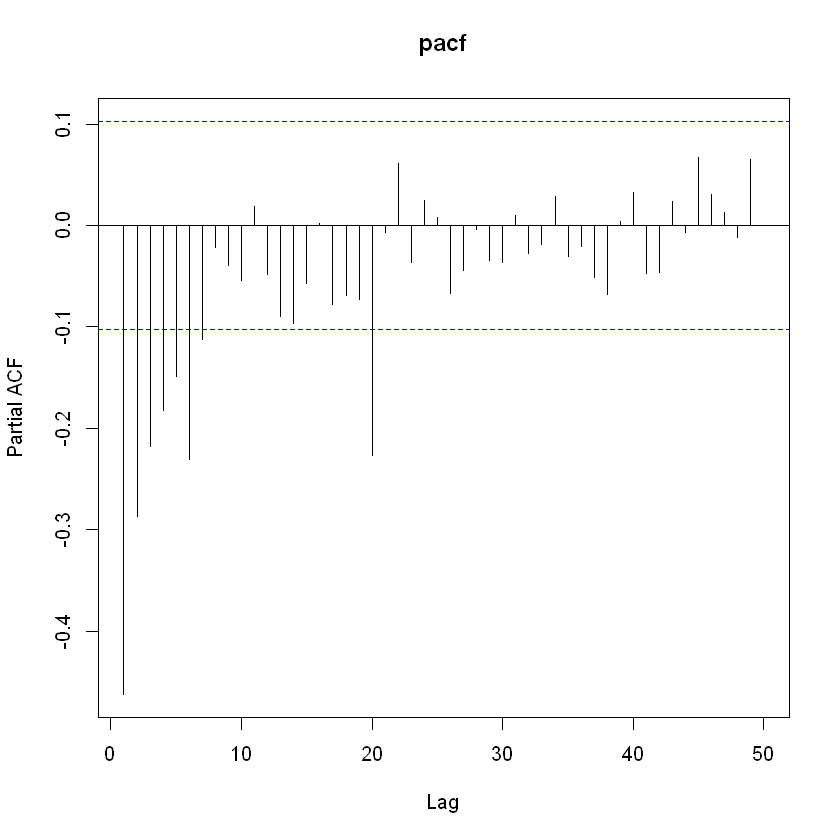

In [19]:
#Box test suggests there is a auto-correlation
#let's plot ACF and PACF to understand further
acf(data_d1,main='acf',50)
pacf(data_d1,main='pacf',50)

#### ACF suggests MA(1) process (ignoring higher order significant peak)
#### PACF suggests AR(7) process

In [25]:
#let's model MA model using ARIMA and figure out
m_ma <- arima(data,order = c(0,1,1))
m_ma
Box.test(resid(m_ma),type='Ljung-Box',lag = log(length(m_ma)))
#Box.test suggest that there is no auto-correlation in the residual from the model


Call:
arima(x = data, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.9480
s.e.   0.0221

sigma^2 estimated as 49.86:  log likelihood = -1229.11,  aic = 2462.22


	Box-Ljung test

data:  resid(m_ma)
X-squared = 4.8324, df = 2.6391, p-value = 0.1466


In [26]:
#let's model AR model using ARIMA and figure out
m_ar <- arima(data,order = c(6,1,0))
m_ar
Box.test(resid(m_ar),type='Ljung-Box',lag = log(length(m_ar)))
#Box.test suggest that there is no auto-correlation in the residual from the model


Call:
arima(x = data, order = c(6, 1, 0))

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6
      -0.7585  -0.6099  -0.5092  -0.4166  -0.3202  -0.2340
s.e.   0.0510   0.0626   0.0671   0.0674   0.0630   0.0514

sigma^2 estimated as 51.67:  log likelihood = -1235.05,  aic = 2484.1


	Box-Ljung test

data:  resid(m_ar)
X-squared = 0.48528, df = 2.6391, p-value = 0.8859


In [29]:
#Both test suggests that there is no auto-correlation
#which one to choose ? AIC is to the rescue
AIC(m_ma) #looks parsimonious
AIC(m_ar)

#let's look at the SSE
sum(resid(m_ma)^2) #looks better
sum(resid(m_ar)^2)

[1] 2462.221

[1] 2484.102

[1] 18148.46

[1] 18809.57

In [35]:
#What is AUTO.ARIMA saying ?
library('forecast')
m_auto <- auto.arima(data)
m_auto
Box.test(resid(m_auto),type='Ljung-Box',lag = log(length(m_auto)))

#Auto-Arima does good job in predicting the best model (even better than what we found)
AIC(m_auto)
sum(resid(m_auto)^2)

Series: data 
ARIMA(0,1,2)                    

Coefficients:
          ma1      ma2
      -0.8478  -0.1079
s.e.   0.0497   0.0496

sigma^2 estimated as 49.49:  log likelihood=-1226.79
AIC=2459.57   AICc=2459.64   BIC=2471.26


	Box-Ljung test

data:  resid(m_auto)
X-squared = 0.93745, df = 2.8904, p-value = 0.8004


[1] 2459.571

[1] 17914.65

In [42]:
summary(m_auto)
cat('MAPE is ',mean(abs(resid(m_auto))/data))
cat('RMSE is ',sqrt(mean(resid(m_auto)^2)))
#note: ACF1 is the first-order auto-correlation coefficient

Series: data 
ARIMA(0,1,2)                    

Coefficients:
          ma1      ma2
      -0.8478  -0.1079
s.e.   0.0497   0.0496

sigma^2 estimated as 49.49:  log likelihood=-1226.79
AIC=2459.57   AICc=2459.64   BIC=2471.26

Training set error measures:
                    ME   RMSE      MAE       MPE    MAPE     MASE         ACF1
Training set 0.4174241 7.0058 5.493027 -1.683678 13.3417 0.755369 0.0009956016
MAPE is  0.133417RMSE is  7.0058

initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, optim.control = list(trace = trc, REPORT = 1, 
    reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 362

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 4.909895

$AICc
[1] 4.915679

$BIC
[1] 3.941949


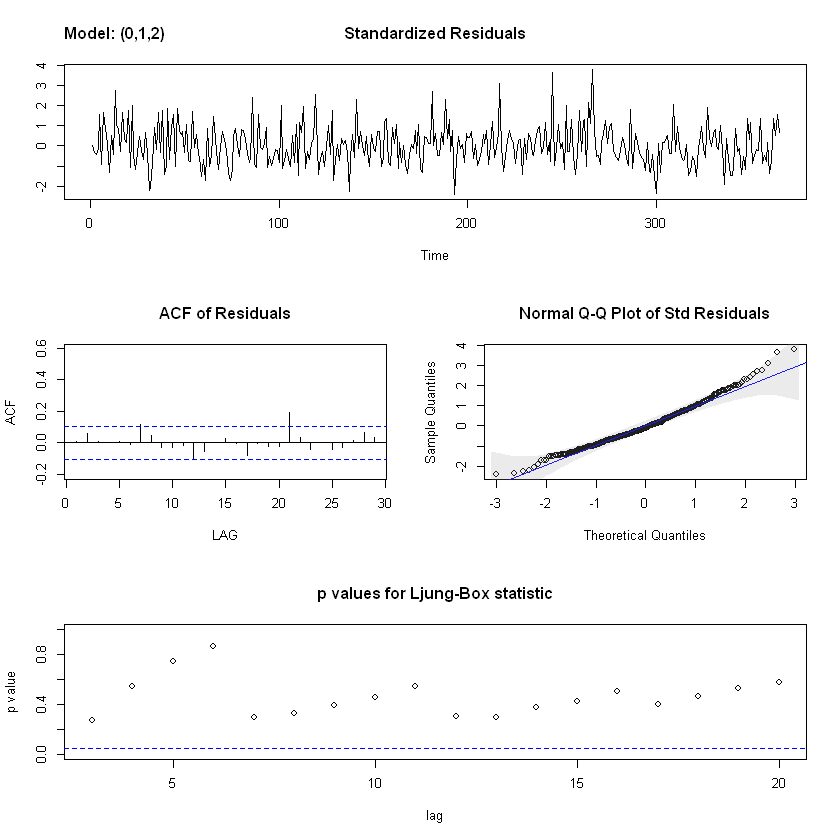

In [43]:
sarima(data,0,1,2,0,0,0)

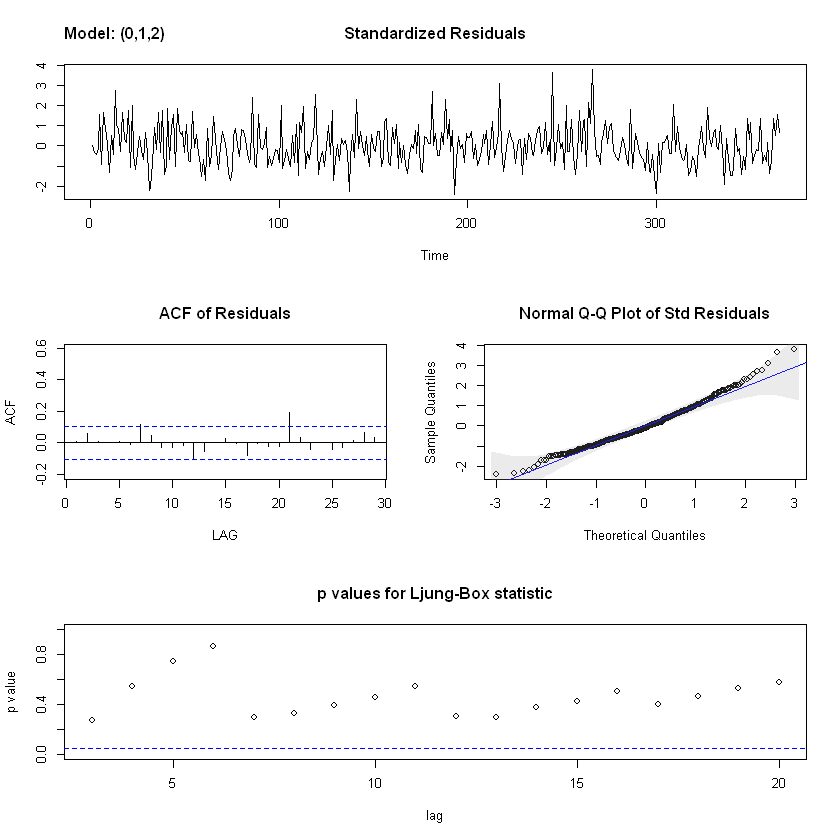

In [46]:
sar <- sarima(data,0,1,2,0,0,0,details = F)